<a href="https://colab.research.google.com/github/IslombekTurakulov/NotebookWorks/blob/main/TurakulovIslombek_Calculus_8_2020_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, diff, solve, nsolve, solveset, latex, S, simplify, fraction, Union, Interval, intersection, limit
from sympy.calculus.util import continuous_domain, maximum, minimum
from sympy.functions import exp
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
%matplotlib inline

## Занятие 8
## Математический анализ
## Дифференцирование функции, заданной параметрически
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
тогда производная $y$ по $x$  находится по формуле
$$
y'_x = \frac{y'_t}{x'_t} = \frac{\psi'_t}{\varphi'_t}
$$
Вторая производная:
$$
y''_{xx} = \frac{x'_t y''_{tt}-x''_{tt}y'_t}{(x'_t)^3}  = \frac{\varphi'_t \psi''_{tt}-\varphi''_{tt}\psi'_t}{(\varphi'_t)^3}
$$
### Задание 1
Найти производные 1 и 2 порядка функции 
$$
\left\{
\begin{matrix}
x = \sin(t) - t\cos(t)\\
y = \cos(t) + t\sin(t)
\end{matrix}
\right.
$$

In [ ]:
t = Symbol('t')
x = Sin(t) - t*Cos(t)
y = Cos(t) + t*Sin(t)

dx = diff(x, t)
dy = diff(y, t)
dy_x = dy/dx

dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3
display(dy_x, dy2_xx)

cos(t)/sin(t)

(t*(-t*sin(t) + cos(t))*sin(t) - t*(t*cos(t) + sin(t))*cos(t))/(t**3*sin(t)**3)

In [ ]:
dy2_xx = simplify(dy2_xx)
display(dy2_xx)

-1/(t*sin(t)**3)

### Задание 2.
Найти нули производных первого и второго порядка, а также точки, в которых эти производные не существуют, для функции
$$
\left\{
\begin{matrix}
x = t^2 - 2t\\
y = t^2 + 2t
\end{matrix}
\right.
$$

In [ ]:
t = Symbol('t')
x = t*t - 2*t
y = t*t + 2*t

dx = diff(x, t)
dy = diff(y, t)
dy_x = dy/dx

dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3
dy_x_num, dy_x_den = fraction(dy_x)
dy_x_num_nul = solveset(dy_x_num)
dy_x_den_nul = solveset(dy_x_den)
display('Первая производная, нули числителя:', dy_x_num_nul, 'нули знаменателя:', dy_x_den_nul)

dy2_xx_num,dy2_xx_den = fraction(dy2_xx)
dy2_xx_num_nul = solveset(dy2_xx_num)
dy2_xx_den_nul = solveset(dy2_xx_den)
dy2_xx_points = list((dy2_xx_num_nul.union(dy2_xx_den_nul)).intersect(Interval.Ropen(0, 2*Pi)))
display('Вторая производная, нули числителя:', dy2_xx_num_nul, 'нули знаменателя:', dy2_xx_den_nul)

'Первая производная, нули числителя:'

FiniteSet(-1)

'нули знаменателя:'

FiniteSet(1)

'Вторая производная, нули числителя:'

EmptySet

'нули знаменателя:'

FiniteSet(1)

### Задание 3. 
Найти точки экстремума и точки перегиба функции Задания 2.

In [ ]:
crit_points = Union(dy_x_num_nul, dy_x_den_nul)
crit_points

FiniteSet(-1, 1)

In [ ]:
crit_points_interval = crit_points.intersection(Interval.Ropen(-1, 1))
crit_points_interval

FiniteSet(-1)

In [ ]:
crit_points_interval = list(crit_points_interval)
crit_points_interval.sort()
crit_points_interval

[-1]

In [ ]:
points = [-1] + [(item + crit_points_interval[i + 1])/2 for i, item in enumerate(crit_points_interval[:-1])] + [1]
points

[-1, 1]

In [ ]:
max_arr=[]
min_arr=[]
for i, item in enumerate(crit_points_interval):
    x_left = float(x.subs(t, points[i]))
    x_right = float(x.subs(t, points[i + 1]))
    if x_left < x_right:
        min_arr.append(item)
    elif x_left > x_right:
        max_arr.append(item)

display('максимум', max_arr, 'минимум', min_arr)

'максимум'

[-1]

'минимум'

[-1]

### Задание 4. Точки перегиба
Найти точки перегиба функции, график строить не нужно. 
$$
\left\{
\begin{matrix}
x = e^t\\
y = te^{2t}
\end{matrix}
\right.
$$

In [ ]:
from sympy.abc import t
x = sympy.exp(t)
y = t*sympy.exp(2*t)
dx = diff(x, t)
dy = diff(y, t)
dy_x = dy/dx
dy2_xx = simplify((dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3)
display(dy2_xx)
dy2_xx_num, dy2_xx_den = fraction(dy2_xx)
dy2_xx_num_nul = solveset(dy2_xx_num)
dy2_xx_den_nul = solveset(dy2_xx_den)
display(dy2_xx_num_nul, dy2_xx_den_nul)

2*t + 3

FiniteSet(-3/2)

EmptySet

## Асимптоты параметрически заданной функции
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
Сначала нужно определить, нет ли таких значений параметра $t$, при которых одна из функций $\varphi(t)$ или $\psi(t)$ обращается в бесконечность, а другая остается конечной. При $\varphi(t_0) = \infty$, а $\psi(t_0) = c$ кривая имеет горизонтальную асимптоту  $y = c$. При  $\psi(t_0) = \infty$, а $\varphi(t_0) = c$ кривая имеет вертикальную асимптоту $x = c$. 

Если $\varphi(t_0) = \psi(t_0) = \infty$ и 
$$
\lim_{t\to t_0} \frac{\psi(t)}{\varphi(t)} = k;\qquad \lim_{t\to t_0} [\psi(t) - k\varphi(t)] = b,
$$
то   кривая имеет наклонную асимптоту  $y = kx + b$. 

### Индивидуальное задание.
Найти асимптоты параметрически заданной функции и изобразить на графике функцию и ее асимптоты.



Вариант 140

$x = 6 e^{t} + 6 e^{- t}$

$y = 7 e^{t} - 7 e^{- t}$



't -> 0'

12

(7*exp(t) - 7*exp(-t), t, 0)

't -> +oo'

oo

oo

(-2.0, 30.0)

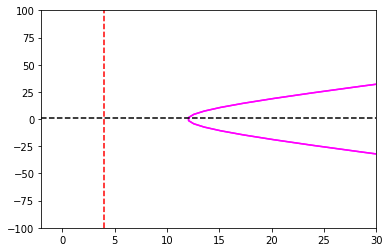

In [4]:
t = Symbol('t')
x = 6*sympy.exp(t) + 6*sympy.exp(-t)
y = 7*sympy.exp(t) - 7*sympy.exp(-t)
display('t -> 0', limit(x, t, 0), (y, t, 0))
display('t -> +oo', limit(x, t, +sympy.oo), limit(y, t, +sympy.oo))

T1 = np.linspace(-10, 10, 100)
T2 = np.linspace(-10, 10, 100)
for T in [T1, T2]:
 plt.plot(6*np.exp(T) + 6*np.exp(-T), 7*np.exp(T) - 7*np.exp(-T), color='magenta')
plt.axhline(y=1, color='black', linestyle='--')
plt.axvline(x=4, color='red', linestyle='--')
plt.ylim(-100, 100)
plt.xlim(-2, 30)